<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" heiht= 250 width= 250 alt=" ">  

|Fecha|Email|
|-----|-----|
|7 de mayo 2020|luishernandezmatos@yahoo.com

# Churn Rate

**Autor:** Computer Science  
**video:** [CS](https://www.youtube.com/watch?v=ocMd2loRfWE&t=3s)  
**Comentario:** Análisis de predicción de la salida de clientes de una compañía telefonica  

---

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

## Dataset:  
##### WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Nota**  
Revisamos los datos nulos y el tipo de datos de este conjunto de datos y no contienen datos nulos. Sin embargo,  
tiene datos objectos los que cambiaremos a numericos pra su procyección

#### Estadística

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['conteo'] = 1

## Análisis de los datos

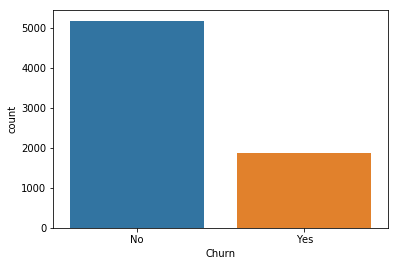

In [9]:
sns.countplot(df.Churn)
plt.show()

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

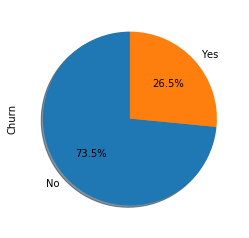

In [11]:
df.Churn.value_counts().plot(kind='pie',autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

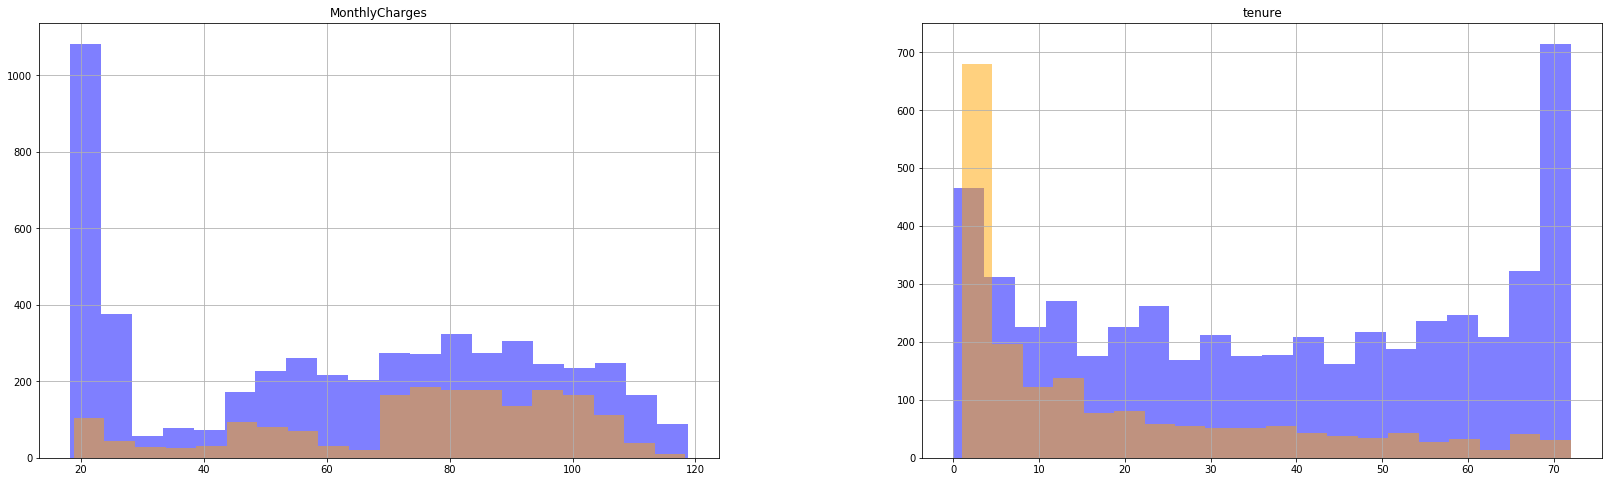

In [12]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28,8))
df[df.Churn =='No'][numerical_features].hist(bins=20, color ='blue', alpha = 0.5, ax = ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=20, color ='orange', alpha = 0.5, ax =ax )
plt.show()

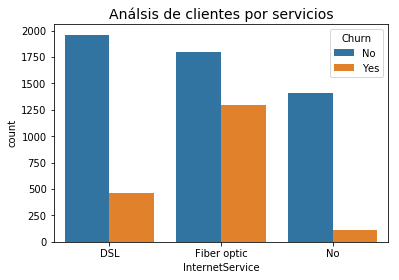

In [13]:
plt.title('Análsis de clientes por servicios', size =14)
sns.countplot(x='InternetService',hue= 'Churn',data = df)
plt.show()

In [14]:
df.groupby(['Churn', 'InternetService']).conteo.sum().unstack()

InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


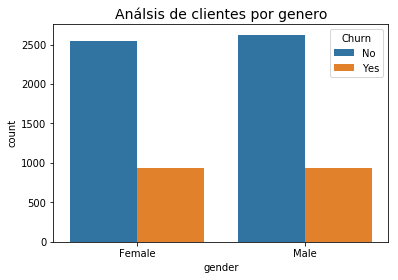

In [15]:
plt.title('Análsis de clientes por genero', size =14)
sns.countplot(x=df.gender,hue= df.Churn)
plt.show()

In [16]:
df.groupby(['Churn', 'gender']).conteo.sum().unstack()

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


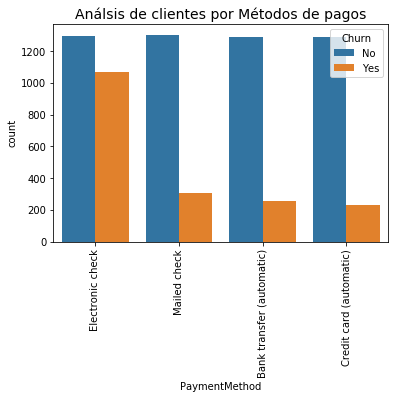

In [17]:
plt.title('Análsis de clientes por Métodos de pagos', size =14)
sns.countplot(x=df.PaymentMethod,hue= df.Churn)
plt.xticks(rotation= 'vertical')
plt.show()

In [18]:
df.groupby(['Churn','PaymentMethod']).conteo.sum().unstack()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


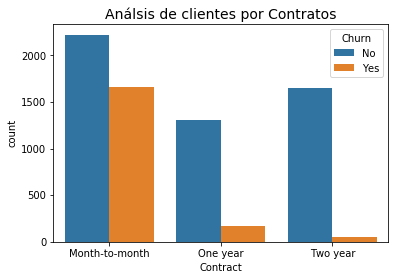

In [19]:
plt.title('Análsis de clientes por Contratos', size =14)
sns.countplot(x = df.Contract, hue= df.Churn)
plt.show()

In [20]:
df.groupby(['Churn','Contract']).conteo.sum().unstack()

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


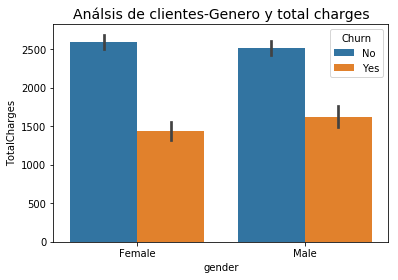

In [34]:
x = df[['gender', 'TotalCharges']]

plt.title('Análsis de clientes-Genero y total charges', size =14)
sns.barplot(x='gender' , y = 'TotalCharges', hue= 'Churn', data=df)
plt.show()

In [27]:
df.groupby(['Churn', 'gender']).TotalCharges.mean().unstack()

gender,Female,Male
Churn,,
No,2594.054422,2517.742402
Yes,1440.979499,1623.491559


---
## Transfromar los datos
- Objetos a Numericos.
- Obejetos o Categoricos a Numericos
---

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,conteo
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [89]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0)

In [91]:
df.TotalCharges.isna().sum()

0

In [23]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
conteo                int64
dtype: object

##### Convertsión de los datos categoricos

In [57]:
df.select_dtypes(include='category').head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [55]:
df =df.astype( {'gender': 'category','Partner': 'category', 'Dependents':'category',
           'PhoneService':'category', 'MultipleLines': 'category',
           'InternetService': 'category', 'OnlineSecurity':'category', 'OnlineBackup':'category',
            'DeviceProtection':'category','TechSupport':'category',
            'StreamingTV': 'category', 'StreamingMovies':'category' ,'Contract':'category',
            'PaperlessBilling':'category','PaymentMethod':'category','Churn':'category'
           })

In [61]:
df['Partner'] = df.Partner.cat.codes
df['Dependents'] = df.Dependents.cat.codes
df["PhoneService"] = df.PhoneService.cat.codes
df['MultipleLines'] = df.MultipleLines.cat.codes
df['InternetService'] = df.InternetService.cat.codes
df['OnlineSecurity']= df.OnlineSecurity.cat.codes
df['OnlineBackup'] = df.OnlineBackup.cat.codes
df['DeviceProtection'] = df.DeviceProtection.cat.codes
df['TechSupport'] = df.TechSupport.cat.codes
df['StreamingTV'] = df.StreamingTV.cat.codes
df['StreamingMovies'] = df.StreamingMovies.cat.codes
df['Contract'] = df.Contract.cat.codes
df['PaperlessBilling'] = df.PaperlessBilling.cat.codes
df['PaymentMethod'] = df.PaymentMethod.cat.codes
df['Churn'] = df.Churn.cat.codes

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,conteo
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,1


## Seleccionar variable X-y
---

In [107]:
X = df.drop(['customerID', 'Churn', 'conteo'], axis = 'columns')
y = df.Churn
X.shape, y.shape

((7043, 19), (7043,))

## Estandarizar los datos

In [104]:
# Maxmimo y minimo
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_ = mm.fit_transform(X)
X_mm.shape, y.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


((7043, 19), (7043,))

### Train-Tet:  
- 20% test
- random = 42
---

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

## Modelo:  
- LogisticRegressor

In [111]:
loreg = LogisticRegression(solver='lbfgs', max_iter= 200)
loreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
y_pred = loreg.predict(X_test)

In [114]:
resultado = pd.DataFrame({'Testeo': y_test, 'Predicciones': y_pred})
resultado.head(15)

,Testeo,Predicciones
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


## evaluación del modelo:  
- accuracy
- clasification report
- matraiz de confusión

In [116]:
metrics.accuracy_score(y_test, y_pred)

0.8161816891412349

In [117]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.67      0.60      0.63       373

   micro avg       0.82      0.82      0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [115]:
metrics.confusion_matrix(y_test, y_pred)

array([[927, 109],
       [150, 223]], dtype=int64)

In [118]:
# comprobar los fallos de la matriz
X_test[y_pred > y_test]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3328,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.25,70.25
3469,0,1,0,0,15,1,0,1,0,0,0,0,2,2,0,1,2,91.50,1400.30
3254,1,1,0,0,17,1,0,1,0,2,2,0,2,2,0,1,2,101.80,1752.45
535,1,0,0,0,12,1,2,1,0,0,2,0,2,0,0,1,2,89.55,1021.75
734,0,0,1,0,27,1,2,1,0,0,2,0,0,2,0,0,0,90.15,2423.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,0,0,0,17,1,0,1,0,2,0,0,2,0,0,1,2,83.55,1329.15
6848,0,0,1,0,2,1,0,0,0,0,2,0,2,2,0,0,1,69.00,147.80
2306,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,1,2,69.85,199.85
5970,1,0,1,0,5,1,2,1,2,0,0,0,0,2,0,1,2,89.15,413.25


In [121]:
df.iloc[2453]

customerID          1197-BVMVG
gender                       0
SeniorCitizen                1
Partner                      0
Dependents                   0
tenure                       4
PhoneService                 1
MultipleLines                2
InternetService              1
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             1
PaymentMethod                2
MonthlyCharges           74.45
TotalCharges            294.45
Churn                        0
conteo                       1
Name: 2453, dtype: object

In [119]:
X_test[y_pred < y_test]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1263,0,1,1,0,68,1,2,1,0,2,0,0,0,2,0,1,0,89.60,6127.60
811,1,0,0,0,70,1,2,1,2,0,0,2,2,2,2,1,1,104.00,7250.15
2526,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.40,19.40
5275,1,0,0,0,11,1,2,0,0,0,2,0,0,0,0,0,2,53.75,608.00
5194,1,0,0,1,22,1,0,1,0,2,2,0,2,0,0,1,2,89.40,2001.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,0,1,1,0,35,1,2,1,2,2,0,2,2,0,0,1,0,100.50,3653.35
5832,1,0,1,1,20,1,0,1,0,0,0,0,0,0,0,1,2,70.45,1470.95
1477,1,0,1,1,61,1,2,1,2,2,0,0,2,2,1,1,2,106.00,6547.70
3721,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3,20.65,38.70


In [122]:
df.iloc[710]

customerID          1029-QFBEN
gender                       1
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       1
PhoneService                 1
MultipleLines                0
InternetService              2
OnlineSecurity               1
OnlineBackup                 1
DeviceProtection             1
TechSupport                  1
StreamingTV                  1
StreamingMovies              1
Contract                     0
PaperlessBilling             0
PaymentMethod                3
MonthlyCharges           19.55
TotalCharges             19.55
Churn                        1
conteo                       1
Name: 710, dtype: object